In [1]:
import os
import numpy as np
from PIL import Image
import glob
import os.path as osp
import matplotlib.pyplot as plt

In [2]:
# 디렉토리 경로 설정
input_image_dir = "./JPEGImages"
input_mask_dir = "./SegmentationClassNpy"
output_dir = "./MaskedImages"

# 출력 디렉토리가 없으면 생성
if not osp.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
# 마스킹할 클래스 ID 정의
# 예: "Ribs Lt"=1, "Ribs Rt"=2
allowed_classes = [5, 6]

In [8]:
# 모든 JPEG 이미지 파일 목록 가져오기
image_files = sorted(glob.glob(osp.join(input_image_dir, "*.jpg")))

# 매칭되는 마스크 파일 존재 여부 확인
matched_files = []
for img_path in image_files:
    base = osp.splitext(osp.basename(img_path))[0]
    mask_path = osp.join(input_mask_dir, base + ".npy")
    if osp.exists(mask_path):
        matched_files.append((img_path, mask_path))
    else:
        print(f"마스크 파일을 찾을 수 없습니다: {mask_path}")

In [9]:
for img_path, mask_path in matched_files:
    base = osp.splitext(osp.basename(img_path))[0]

    # 원본 이미지 로드
    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)

    # 마스크 로드
    mask = np.load(mask_path)

    # allowed_classes에 해당하는 부분만 유지하고 나머지는 0으로 설정
    binary_mask = np.isin(mask, allowed_classes).astype(
        np.uint8
    )  # 1과 0으로 구성된 이진 마스크

    # 이진 마스크를 3채널로 확장
    binary_mask_3ch = np.stack([binary_mask] * 3, axis=-1)

    # 마스크 적용: 마스크가 1인 부분은 원본 이미지, 0인 부분은 검은색
    masked_img_np = img_np * binary_mask_3ch

    # NumPy 배열을 PIL 이미지로 변환
    masked_img = Image.fromarray(masked_img_np)

    # 저장 경로 설정
    out_path = osp.join(output_dir, base + "_masked.jpg")
    masked_img.save(out_path)

    print(f"저장된 마스크 이미지: {out_path}")

저장된 마스크 이미지: ./MaskedImages\processed_0000403_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0000437_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0004169_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0004330_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0005418_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0006161_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0019225_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0033327_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0033979_masked.jpg
저장된 마스크 이미지: ./MaskedImages\processed_0034546_masked.jpg


c:\Users\chona\Manual_Labeling\nhenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chona\Manual_Labeling\nhenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chona\Manual_Labeling\nhenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chona\Manual_Labeling\nhenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\chona\Manual_Labeling\nhenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canv

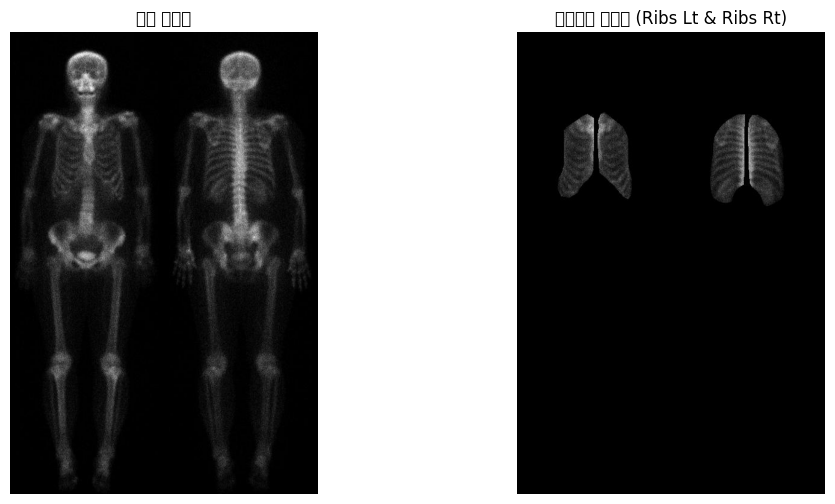

In [11]:
# 예시: 첫 번째 마스킹된 이미지 표시
if matched_files:
    sample_img_path, sample_mask_path = matched_files[0]
    base = osp.splitext(osp.basename(sample_img_path))[0]
    masked_img_path = osp.join(output_dir, base + "_masked.jpg")

    # 원본 이미지
    original_img = Image.open(sample_img_path).convert("RGB")

    # 마스킹된 이미지
    masked_img = Image.open(masked_img_path).convert("RGB")

    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img)
    axes[0].set_title("원본 이미지")
    axes[0].axis("off")

    axes[1].imshow(masked_img)
    axes[1].set_title("마스킹된 이미지 (Ribs Lt & Ribs Rt)")
    axes[1].axis("off")

    plt.show()